**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: David A. Serrano García
*   MATRÍCULA: A01795935


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [325]:
from google.colab import data_table
import pandas as pd
air_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MNA/Ciencia y analítica de datos/LaqnData.csv")

print(f"\n{'=' * 15} shape {'=' * 25}")

print("El DataSet cuenta con {rows:d} filas y {columns:d} columnas.".format(rows=air_df.shape[0], columns=air_df.shape[1]))

print(f"\n{'=' * 15} columns {'=' * 25}")

print("Las columnas en el DataSet son: {columns}".format(columns=", ".join(air_df.columns)))

print(f"\n{'=' * 15} head {'=' * 25}")

print("Primeras 5 filas del DataSet:")
print(air_df.head())
HEADERS = {
  "site":                   "Site",
  "species":                "Species",
  "reading_date_time":      "ReadingDateTime",
  "value":                  "Value",
  "units":                  "Units",
  "provisional_or_ratified":"Provisional or Ratified"
}

print(f"\n{'=' * 15} tail {'=' * 25}")

print("Últimas 5 filas del DataSet:")
print(air_df.tail())

print(f"\n{'=' * 15} dtypes {'=' * 25}")

print("Los tipos de datos para cada columna son:")
print('\n'.join(f" - {col}: {dtype}" for col, dtype in air_df.dtypes.items()))

print(f"\n{'=' * 15} Porcentaje de valores faltantes por columna {'=' * 25}")

missing_stats = lambda df: (df.isna().sum(), df.isna().sum() / len(df) * 100)
non_null_df = air_df[~air_df[HEADERS['value']].isnull()]
print("Porcentaje de valores faltantes por columna:")

missing_total, missing_percentage = missing_stats(air_df)
print('\n'.join(f" - {col}: {dtype}" for col, dtype in air_df.dtypes.items()))
for col in air_df.columns:
    print(f" - {col}: {missing_percentage[col]:.2f}% (Faltantes: {missing_total[col]:d})")


=============== shape =========================
El DataSet cuenta con 43800 filas y 6 columnas.

=============== columns =========================
Las columnas en el DataSet son: Site, Species, ReadingDateTime, Value, Units, Provisional or Ratified

=============== head =========================
Primeras 5 filas del DataSet:
  Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  CT3      NO  01/01/2017 00:00    3.5  ug m-3                       R
1  CT3      NO  01/01/2017 01:00    3.6  ug m-3                       R
2  CT3      NO  01/01/2017 02:00    2.2  ug m-3                       R
3  CT3      NO  01/01/2017 03:00    2.1  ug m-3                       R
4  CT3      NO  01/01/2017 04:00    3.3  ug m-3                       R

=============== tail =========================
Últimas 5 filas del DataSet:
      Site Species   ReadingDateTime  Value   Units Provisional or Ratified
43795  CT3   PM2.5  31/12/2017 19:00   -2.0  ug m-3                       R
43796  CT3 

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [326]:
print("Cantidad de valores únicos por columna:")
print(air_df.nunique())

print(f"\n{'=' * 15} ¿Cuántas mediciones se hicieron? {'=' * 25}")
print(f"Cantidad total de mediciones fueron: {len(air_df)}")
print(f"Cantidad total de mediciones fueron con valores capturados no nulos fueron: {len(non_null_df)}")

print(f"\n{'=' * 15} ¿Cuántos contaminantes del aire (Species) se analizaron? {'=' * 25}")

unique_species = air_df[HEADERS['species']].unique()
print(f"Cantidad de contaminantes unicos en el aire analizados fueron en total {len(unique_species)}:")
print('\n'.join(f" - {species}" for species in unique_species))

print(f"\n{'=' * 15} ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe. {'=' * 25}")

columns_to_remove = [HEADERS['site'], HEADERS['provisional_or_ratified']]

print("Las columnas que no presentan ningun valor informativo relevante y se eliminar del datafrae son:")
print('\n'.join(f" - {r}" for r in columns_to_remove))


air_df = air_df.drop(columns=[col for col in columns_to_remove if col in air_df.columns])

print("Cantidad de valores únicos por columna:")
print(air_df.nunique())

print(f"\n{'=' * 15} La columna Units tampoco posee valor informativo. Verifícalo con la función unique() y elimínala del dataframe. {'=' * 25}")

# Dict/Catalogo variante de tipo de unidades
UNITS_VARIANTS = {
    "ugm3": ["ug m-3", "ug m-3 as NO2", "ug/m3"],
}

if (HEADERS['units'] in air_df.columns):
  print("Unique values in 'Units':", air_df["Units"].unique())

  are_all_ugm3 = all(unit in UNITS_VARIANTS['ugm3'] for unit in air_df[HEADERS['units']].unique())
  print("Todas las unidades son del tipo ''ug m-3?'' ", "Si" if are_all_ugm3 else "No")

  if are_all_ugm3:
    air_df = air_df.drop(columns=[HEADERS['units']])
else:
  print(f"La columna  {HEADERS['units']} no existe dentro del DataFrame")

print("Cantidad de valores únicos por columna:")
air_df.nunique()

Cantidad de valores únicos por columna:
Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

=============== ¿Cuántas mediciones se hicieron? =========================
Cantidad total de mediciones fueron: 43800
Cantidad total de mediciones fueron con valores capturados no nulos fueron: 40570

=============== ¿Cuántos contaminantes del aire (Species) se analizaron? =========================
Cantidad de contaminantes unicos en el aire analizados fueron en total 5:
 - NO
 - NO2
 - NOX
 - PM10
 - PM2.5

=============== ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe. =========================
Las columnas que no presentan ningun valor informativo relevante y se eliminar del datafrae son:
 - Site
 - Provisional or Ratified
Cantidad de valores únicos por columna:


Species               5
ReadingDateTime    8760
Value              1847
dtype: int64

3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [327]:
print(f"\n{'=' * 15} Conteo y validación por cada categoría de \"Species\" {'=' * 25}")
species_counts = air_df[HEADERS['species']].value_counts()

print("Conteo por especie:")
print('\n'.join(f"- {species}: {count}" for species, count in species_counts.items()))

total_measurements = len(air_df)
total_species_count = species_counts.sum()

if total_species_count == total_measurements:
    print("OK: La suma de las categorías de \"Species\" coincide con el total de mediciones.")
else:
    print("ERROR: El total de mediciones no coincide con la suma de todas las categorías de \"Species\".")


print(f"\n{'=' * 15} Conteo y validación por cada categoría de \"Species\" donde valor registrado no es NULO {'=' * 25}")

species_counts = non_null_df[HEADERS['species']].value_counts()

print("Conteo por especie:")
print('\n'.join(f"- {species}: {count}" for species, count in species_counts.items()))

total_measurements = len(non_null_df)

total_species_count = species_counts.sum()

if total_species_count == total_measurements:
    print("OK: La suma de las categorías de \"Species\" coincide con el total de mediciones (sin valores registrados nulos).")
else:
    print("ERROR: El total de mediciones no coincide con la suma de todas las categorías de \"Species\" (sin nulos).")


=============== Conteo y validación por cada categoría de "Species" =========================
Conteo por especie:
- NO: 8760
- NO2: 8760
- NOX: 8760
- PM10: 8760
- PM2.5: 8760
OK: La suma de las categorías de "Species" coincide con el total de mediciones.

=============== Conteo y validación por cada categoría de "Species" donde valor registrado no es NULO =========================
Conteo por especie:
- NO: 8660
- NO2: 8660
- NOX: 8660
- PM10: 8657
- PM2.5: 5933
OK: La suma de las categorías de "Species" coincide con el total de mediciones (sin valores registrados nulos).


4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [328]:
print(f"\n{'=' * 15} Promedio del valor por cada specie contaminante {'=' * 25}")

average_by_species = air_df.groupby(HEADERS['species'])[HEADERS['value']].mean()
print("Promedio del valor por cada especie de contaminante:")
print('\n'.join(f" - {species}: {avg:.2f}%" for species, avg in average_by_species.items()))


=============== Promedio del valor por cada specie contaminante =========================
Promedio del valor por cada especie de contaminante:
 - NO: 15.05%
 - NO2: 38.01%
 - NOX: 61.08%
 - PM10: 22.55%
 - PM2.5: 15.00%


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [329]:
pvt_df = air_df.pivot(index=HEADERS['reading_date_time'], columns=HEADERS['species'], values=HEADERS['value'])
pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [334]:
describe_stats = pvt_df.describe()
print (describe_stats.T)

print(f"\n{'=' * 15} ¿Cuál es el mayor valor de NO2 registrado? ¿A qué día pertenece? {'=' * 25}")
max_no2 = describe_stats["NO2"]["max"]
date_max_no2 = pvt_df["NO2"].idxmax()
print(f"El mayor valor de NO2 registrado es {max_no2} y pertenece al día {date_max_no2}.")

print(f"\n{'=' * 15} ¿Cuál es el menor valor de PM10 registrado? ¿A qué día pertenece? {'=' * 25}")
min_pm10 = describe_stats["PM10"]["min"]
date_min_pm10 = pvt_df["PM10"].idxmin()
print(f"El menor valor de PM10 registrado es {min_pm10} y pertenece al día {date_min_pm10}.")

print(f"\n{'=' * 15} ¿Cuál es la mediana del NO? ¿Cómo se interpreta? {'=' * 25}")
median_no = describe_stats["NO"]["50%"]
print(f"La mediana del NO es {median_no}. Nos dice que mitad de los datos/valores registrados para NO es mayor a {median_no} y la otra mitad es menor a {median_no}.")

print(f"\n{'=' * 15} ¿Cuál es el primer cuartil de PM2.5? ¿Qué significa? {'=' * 25}")
first_quartil_pm25 = describe_stats["PM2.5"]["25%"]
print(f"El primer cuartil de PM2.5 es {first_quartil_pm25}. Significa que el 25% de los valores de PM2.5 está por debajo de {first_quartil_pm25}")


          count       mean        std  min   25%   50%   75%        max
Species                                                                
NO       8660.0  15.045115  26.678565 -2.0   3.1   7.1  15.5  401.79999
NO2      8660.0  38.010185  18.580841  2.8  23.8  35.3  49.9  120.20000
NOX      8660.0  61.078661  54.584805  1.0  30.3  46.9  73.8  734.29999
PM10     8657.0  22.551704  15.344755 -5.6  13.9  19.5  27.3  633.09998
PM2.5    5933.0  14.999831  13.558588 -8.0   7.0  11.0  18.0  128.00000

=============== ¿Cuál es el mayor valor de NO2 registrado? ¿A qué día pertenece? =========================
El mayor valor de NO2 registrado es 120.2 y pertenece al día 24/01/2017 19:00.

=============== ¿Cuál es el menor valor de PM10 registrado? ¿A qué día pertenece? =========================
El menor valor de PM10 registrado es -5.6 y pertenece al día 12/09/2017 23:00.

=============== ¿Cuál es la mediana del NO? ¿Cómo se interpreta? =========================
La mediana del NO es 7.1. Nos

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?


=============== ¿Qué contaminante tiene mayor variabilidad? =========================
El contaminante que muestra la mayor variabilidad es el NOX. Se muestran valores extremadamente altos, alcanzando hasta 700 ug m^-3, lo que indica una considerable variabilidad en las mediciones de este contaminante.


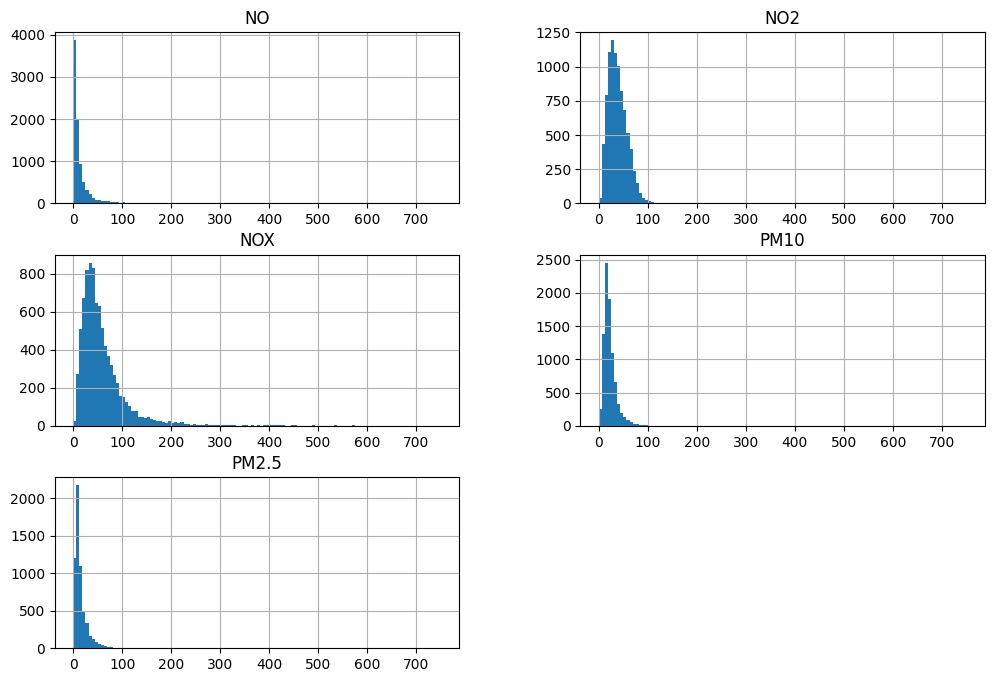

In [331]:
pvt_df.hist(figsize=(12, 8), bins=120, range=(0, 750))
print(f"\n{'=' * 15} ¿Qué contaminante tiene mayor variabilidad? {'=' * 25}")
print("El contaminante que muestra la mayor variabilidad es el NOX. Se muestran valores extremadamente altos, \
alcanzando hasta 700 ug m^-3, lo que indica una considerable variabilidad en las mediciones de este contaminante.")

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [332]:
datetime_df = air_df.ReadingDateTime.str.split(' ', expand=True) # Crea un DataFrame a partir de la columna ReadingDateTime, separando la Fecha y la Hora.
datetime_df.columns = ['Date', 'Time'] # Asigna los nombres de las columnas 1.Date y 2.Time.
datetime_df # Muestra el DataFrame datetime_df.
date_df = datetime_df.Date.str.split('/', expand=True) # Crea un DataFrame a partir de la columna Date, separando Día, Mes y Año.
date_df.columns = ['Day', 'Month', 'Year'] # Asigna los nombres de las columnas 1.Day, 2.Month, 3.Year.
date_df # Muestra el DataFrame date_df
# Combina los DataFrames air_df, date_df y datetime_df en uno solo, luego elimina la columna ReadingDateTime.
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime', 'Year'])
air_df = air_df.set_index(['Month', 'Day', 'Time', 'Species']) # Establece el índice en el DataFrame air_df utilizando las columnas "Month", "Day", "Time" y "Species".
air_df # Muestra el DataFrame air_df.

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [333]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

---

# ¿Son iguales?
No son iguales, ya que en el ejercicio anterior, las 'species' quedan como un valor dentro de la columna 'Species', y al usar 'unstack()', las 'species' se distribuyen como columnas.

---

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

## Transformación de DataFrames: `melt()`/`pivot()` y `stack()`/`unstack()`

Tanto `melt()`/`pivot()` como `stack()`/`unstack()` se utilizan para transformar la forma de un DataFrame entre formatos 'largo' y 'ancho'.

### `melt()`:
- **Transforma DataFrames de un formato 'ancho' a 'largo'**: Colapsa múltiples columnas en dos columnas, una con los nombres de las variables y otra con los valores.

### `pivot()`:
- **Transforma DataFrames de formato 'largo' a 'ancho'**: Crea una tabla pivote que reorganiza los datos con índices únicos y columnas correspondientes a valores específicos.

### `stack()`:
- **Toma uno o más niveles de columnas y los convierte en índices**: Produce un DataFrame en formato 'largo'.

### `unstack()`:
- **Realiza la operación inversa a `stack()`**: Convierte niveles de índices en niveles de columnas, resultando en un DataFrame en formato 'ancho'.

En base a estas definiciones:

- **¿Cuál elegirías?** Eligiría **stack()**.
- **¿Por qué?** Ambos, `melt()` y `stack()`, toman un DataFrame en formato 'ancho' y lo transforman en formato 'largo'. La definición de `melt()` indica: *Transforma DataFrames de un formato 'ancho' a 'largo'*, lo que corresponde a lo que hace `stack()`: *produce un DataFrame en formato 'largo'*.
